In [4]:
def generate_blobs(mus_1,covs_1,mus_2,covs_2,n_samples):
    x = np.empty([n_samples,2],dtype=float)
    y=np.empty([n_samples],dtype=int)
    z = np.empty([n_samples],dtype=int)
    pis = np.array([0.3, 0.3, 0.4])
    acc_pis = [np.sum(pis[:i]) for i in range(1, len(pis)+1)]
    selected_mu = mus_1[0]
    selected_cov = covs_1[0]
    for nums in range(n_samples):
        k = 0
        r = np.random.uniform(0, 1)
        for i, threshold in enumerate(acc_pis):
            if r < threshold:
                k = i
                break
        cl = 0        
        r = np.random.uniform(0, 1)
        if (r > 0.5):
            cl = 1
        if (cl==0):
            selected_mu = mus_1[k]
            selected_mu.shape = (2,1)
            selected_cov = covs_1[k]
        else:
            selected_mu = mus_2[k]
            selected_mu.shape = (2,1)
            selected_cov = covs_2[k]
        L = np.linalg.cholesky(selected_cov)
        X = np.random.normal(size=(2, 1))
        Y = L.dot(X) + selected_mu
        x[nums] = np.transpose(Y)
        y[nums] = cl
        z[nums] = 3 * cl + k
    return x,y,z

[[ 0.97627008  4.30378733]
 [ 2.05526752  0.89766366]
 [-1.52690401  2.91788226]]


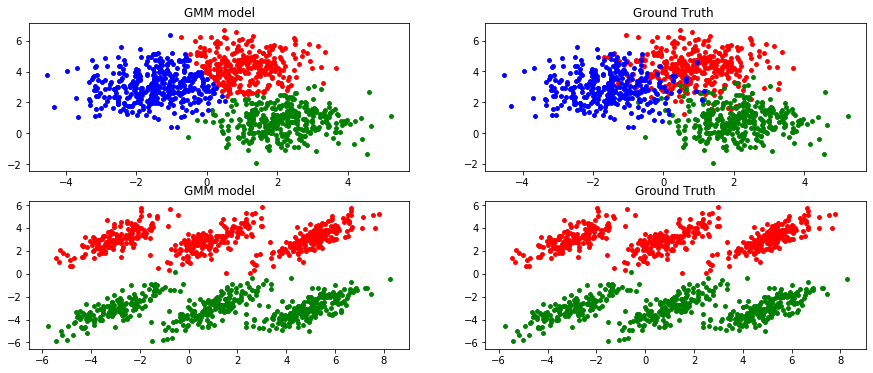

In [6]:
class GMM:
    def __init__(self, k, max_iter=3):
        self.k = k
        self.max_iter = int(max_iter) 

    def initialize(self, X):
        self.shape = X.shape 
        self.n, self.m = self.shape 
        self.phi = np.full(shape=self.k, fill_value=1/self.k) 
        self.weights = np.full(shape=self.shape, fill_value=1/self.k)
        rr = np.random.randint(low=0, high=self.n, size=self.k)
        self.mu = [X[_,:] for _ in rr ] 
        self.sigma = [np.cov(X.T) for _ in range(self.k) ]
        ##### Expectation extracts weights and phi
    def expectation(self, X):
        self.weights = self.predict_proba(X)
        self.phi = self.weights.mean(axis=0)
        #### Maximization Update parameters.
    def maximization(self, X):
        for i in range(self.k):
            weight = self.weights[:, [i]]
            allWeight = weight.sum()
            self.mu[i] = (X * weight).sum(axis=0) / allWeight
            self.sigma[i] = np.cov(X.T, aweights=(weight/allWeight).flatten(), bias=True)
            
            #### It iterates over the number of iterations and prediction, to do expectation and run maximization 
            ### after estimating phi and weights.
    def fit(self, X):
        self.initialize(X)
        for iteration in range(self.max_iter):
            clusters = gmm.predict(X)
            self.expectation(X)
            self.maximization(X)
            
 #### Each data point has k membership value toward each cluster. It is used to update parameters. 
    def predict_proba(self, X):
        likey = np.zeros( (self.n, self.k) ) 
        for i in range(self.k):
            distribution = multivariate_normal(mean=self.mu[i],cov=self.sigma[i])
            likey[:,i] = distribution.pdf(X) 

        up = likey * self.phi
        down = up.sum(axis=1)[:, np.newaxis]
        weights = up / down
        return weights
    #### This function is called when the model is fit. It just assigns cluster to each data point. 
    def predict(self, X):
        weights = self.predict_proba(X)
        return np.argmax(weights, axis=1)

    
    
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
samples,labels,centers = make_blobs(n_samples=1000, centers=3, n_features=2,random_state=0,return_centers=True)
print(centers)



n_samples = 1000
mus_1 = [np.array([-3, 3]), np.array([1, 3]), np.array([5, 3])]
covs_1 = [np.array([[1, 0.8], [0.8, 1]]), np.array([[1, 0.8], [0.8, 1]]), np.array([[1, 0.8], [0.8, 1]])]

mus_2 = [np.array([-3, -3]), np.array([1, -3]), np.array([5, -3])]
covs_2 = [np.array([[1, 0.8], [0.8, 1]]), np.array([[1, 0.8], [0.8, 1]]), np.array([[1, 0.8], [0.8, 1]])]

np.random.seed(42)
gmm = GMM(k=3, max_iter=14)
gmm.fit(samples)
prediction = gmm.predict(samples)

colours = ('red', 'green','blue')

fig, axs = plt.subplots(2,2,figsize = (15,6))
axs[0,0].set_title("GMM model")
for n_class in range(3):
    axs[0,0].scatter(samples[prediction==n_class][:, 0], samples[prediction==n_class][:, 1], 
               c=colours[n_class], s=15)


colours = ('red', 'green','blue')
axs[0,1].set_title("Ground Truth ")
for n_class in range(3):
    axs[0,1].scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1], 
               c=colours[n_class], s=15)


x,y,_ = generate_blobs(mus_1,covs_1,mus_2,covs_2,1000)
axs[1,1].set_title("Ground Truth")
for n_class in range(2):
    axs[1,1].scatter(x[y==n_class][:, 0], x[y==n_class][:, 1], 
               c=colours[n_class], s=15)
gmm = GMM(k=2, max_iter=14)
gmm.fit(x)
prediction = gmm.predict(x)

axs[1,0].set_title("GMM model")
for n_class in range(2):
    axs[1,0].scatter(x[y==n_class][:, 0], x[y==n_class][:, 1], 
               c=colours[n_class], s=15)